# Normalization
Image normalization can improve model generalization and training speed.
The xrays we have are all grayscale images. Therefore we will be mainly concered with the brightness and contrast of the images.
We'd like to:
 - reduce noise (singal spikes due to black background or white text overlay)
 - increase visibility of details 
 
In this notebook we will test the following methods:
- [digital windowing](http://www.sprawls.org/resources/DIGPROCESS/module.htm#13) & dynamically windowing as described by [Guendel et al](https://arxiv.org/abs/1905.06362)
- gaussian smoothing 
- median filtering 
- [Blurred Mask Subtraction](http://www.sprawls.org/resources/DIGPROCESS/module.htm#14)
- [Histogram Equalization](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)

In [141]:
#make sure your working directory is the repository root. 
#os.chdir("../../")
os.getcwd()

'C:\\Users\\tsbau\\git\\idp-radio-1'

In [87]:
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimgat
import scipy.ndimage as ndimage
from src.preprocessing.rescaling import scaler
from sklearn.preprocessing import normalize

## Initialization
Loading test image:

In [142]:
dataset_folder = "data/dev_dataset/"
chexpert_folder = dataset_folder + "CheXpert-v1.0-small/"

In [206]:
frontal = cv2.imread(chexpert_folder + 'train/patient00002/study1/view1_frontal.jpg', cv2.IMREAD_GRAYSCALE) 
lateral = cv2.imread(chexpert_folder + 'train/patient00002/study1/view2_lateral.jpg', cv2.IMREAD_GRAYSCALE)

frontal_resized = scaler.Scaler(frontal, 320).resize('LINEAR') * 255
lateral_resized = scaler.Scaler(lateral, 320).resize('LINEAR') * 255
num_bins = 256
grayscale_vlaues = [0,255]

# images need to be of type 'unsigned int 8bit' for cv2.equalizeHist to work
frontal_resized = np.uint8(frontal_resized)
lateral_resized = np.uint8(lateral_resized)

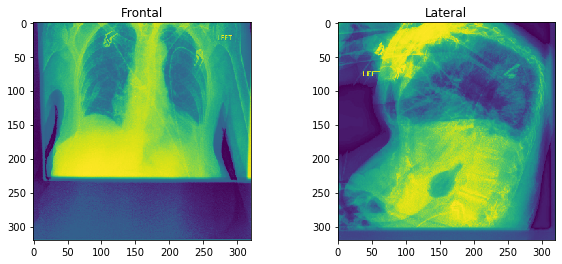

In [207]:
def show_images (frontal, lateral, fig_size = (10, 4)):
    fig, axs = plt.subplots(ncols=2, figsize = fig_size)
    axs[0].set_title('Frontal')
    axs[0].imshow(frontal)
    axs[1].set_title('Lateral')
    axs[1].imshow(lateral)
    plt.show()
show_images(frontal_resized, lateral_resized)

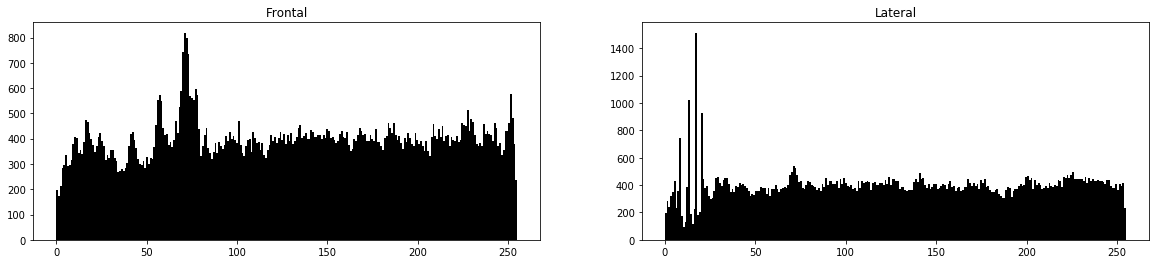

In [187]:
def plot_historgram(frontal, lateral):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 4))
    axs[0].set_title('Frontal')
    axs[0].hist(frontal.flatten(),num_bins, grayscale_vlaues, color = 'k')
    axs[1].set_title('Lateral')
    axs[1].hist(lateral.flatten(),num_bins, grayscale_vlaues, color = 'k')
    plt.show()
plot_historgram(frontal_resized, lateral_resized)

## Histogram Equalization
Wikipedia page on [Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization) for mathematical details on implementation

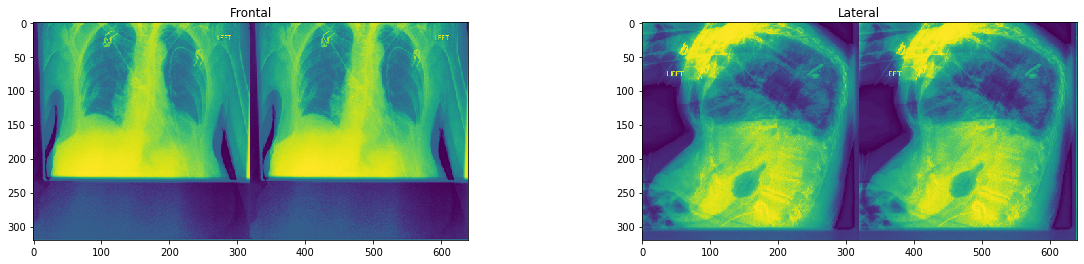

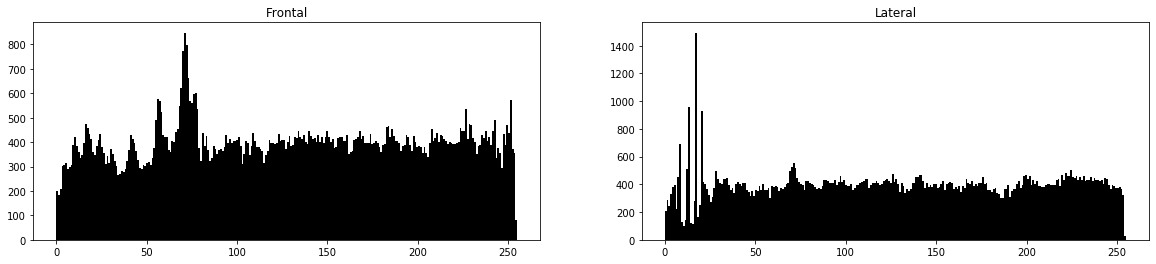

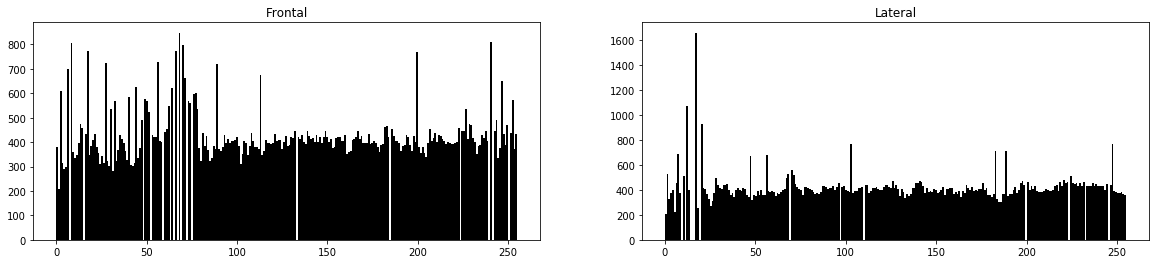

In [214]:
frontal_equalized_hist = cv2.equalizeHist(frontal_resized)
lateral_equalized_hist = cv2.equalizeHist(lateral_resized)
show_images(np.hstack((frontal_resized,frontal_equalized_hist)), np.hstack((lateral_equalized_hist,lateral_equalized_hist)), fig_size = (20, 4))
plot_historgram(frontal_resized, lateral_resized)
plot_historgram(frontal_equalized_hist, lateral_equalized_hist)

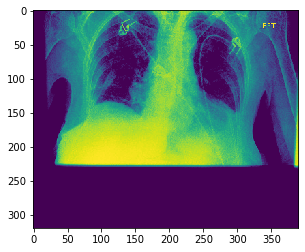

In [48]:
imgplot = plt.imshow(frontal, clim=(100, 255))

In [51]:
normalized_frontal = normalize(frontal)

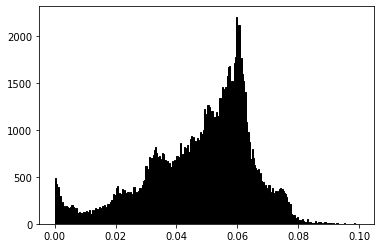

In [54]:
normalized_imghist = plt.hist(normalized_frontal.ravel(), bins=255, range=(0.0, 0.1), fc='k', ec='k')

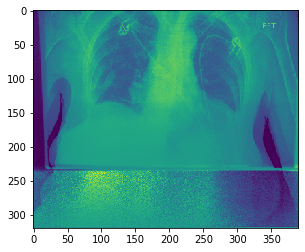

In [55]:
normalized_imgplot = plt.imshow(normalized_frontal)

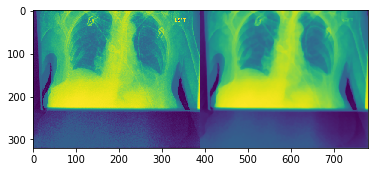

In [165]:
frontal_processed = cv2.GaussianBlur(frontal,(3,3),0)
frontal_processed = cv2.medianBlur(frontal_processed,5)
imgplot = plt.imshow(np.hstack((frontal,frontal_processed)))